In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset(keep it in the archive folder or adjust the path accordingly)
df = pd.read_csv('./archive/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)

# Rename crucial columns for easier typing and better readability in visualizations
df.rename(columns={
    'iyear': 'Year',
    'imonth': 'Month',
    'iday': 'Day',
    'country_txt': 'Country',
    'region_txt': 'Region',
    'attacktype1_txt': 'AttackType',
    'target1': 'Target',
    'nkill': 'Killed',
    'nwound': 'Wounded',
    'gname': 'Group',
    'targtype1_txt': 'TargetType',
    'weaptype1_txt': 'Weapon_type',
    'motive': 'Motive'
}, inplace=True)

# Create a new column 'Casualties' (Killed + Wounded) for impact analysis
df['Casualties'] = df['Killed'].fillna(0) + df['Wounded'].fillna(0)

print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns!")

Dataset loaded successfully with 181691 rows and 136 columns!


## 1. Global Trends: How have attacks changed over time?
This visualization answers the question: Is the world becoming more violent? It plots the number of attacks per year.


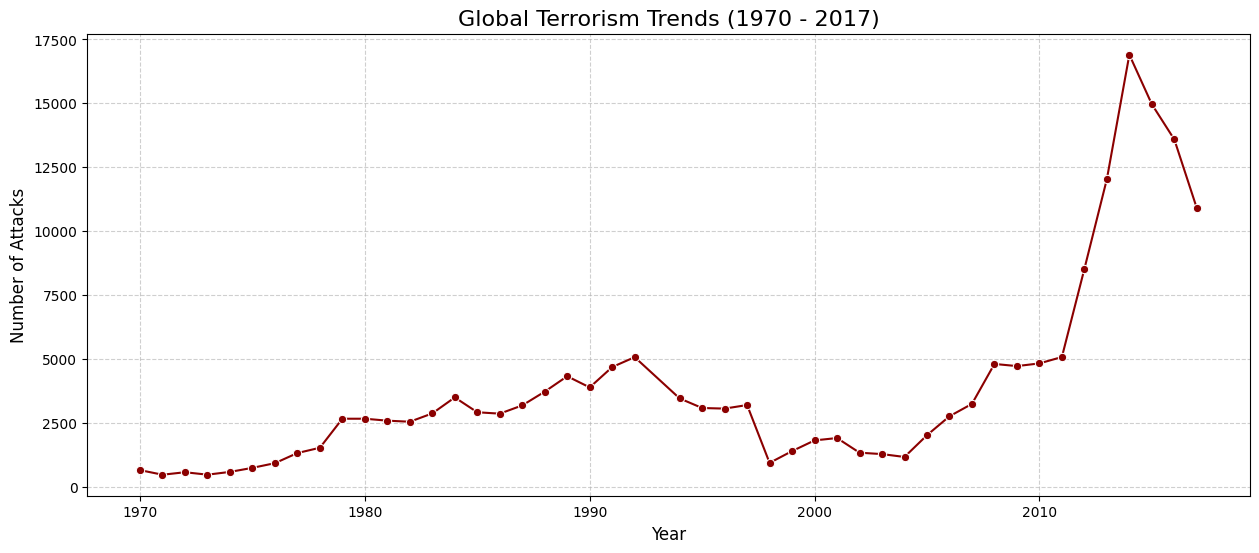

In [3]:
# --- Question 1: Attacks over Time ---
plt.figure(figsize=(15, 6))

# Count the number of attacks per year
attacks_per_year = df['Year'].value_counts().sort_index()

sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, color='darkred', marker='o')

plt.title('Global Terrorism Trends (1970 - 2017)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Observation:

The data reveals a distinct pattern in global terrorism activity. While the 1970s through the early 2000s saw relatively stable or slowly fluctuating numbers of attacks, there is a dramatic surge beginning around 2010-2012. This spike likely correlates with the destabilization in the Middle East following the Arab Spring and the rise of groups like ISIS. The trend shows that modern terrorism has become significantly more frequent than in the late 20th century.

## 2. Regional Hotspots: Where is it happening?
This visualization compares regions to show where the violence is concentrated.

C:\Users\pandi\AppData\Local\Temp\ipykernel_16840\2372982332.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette='magma')


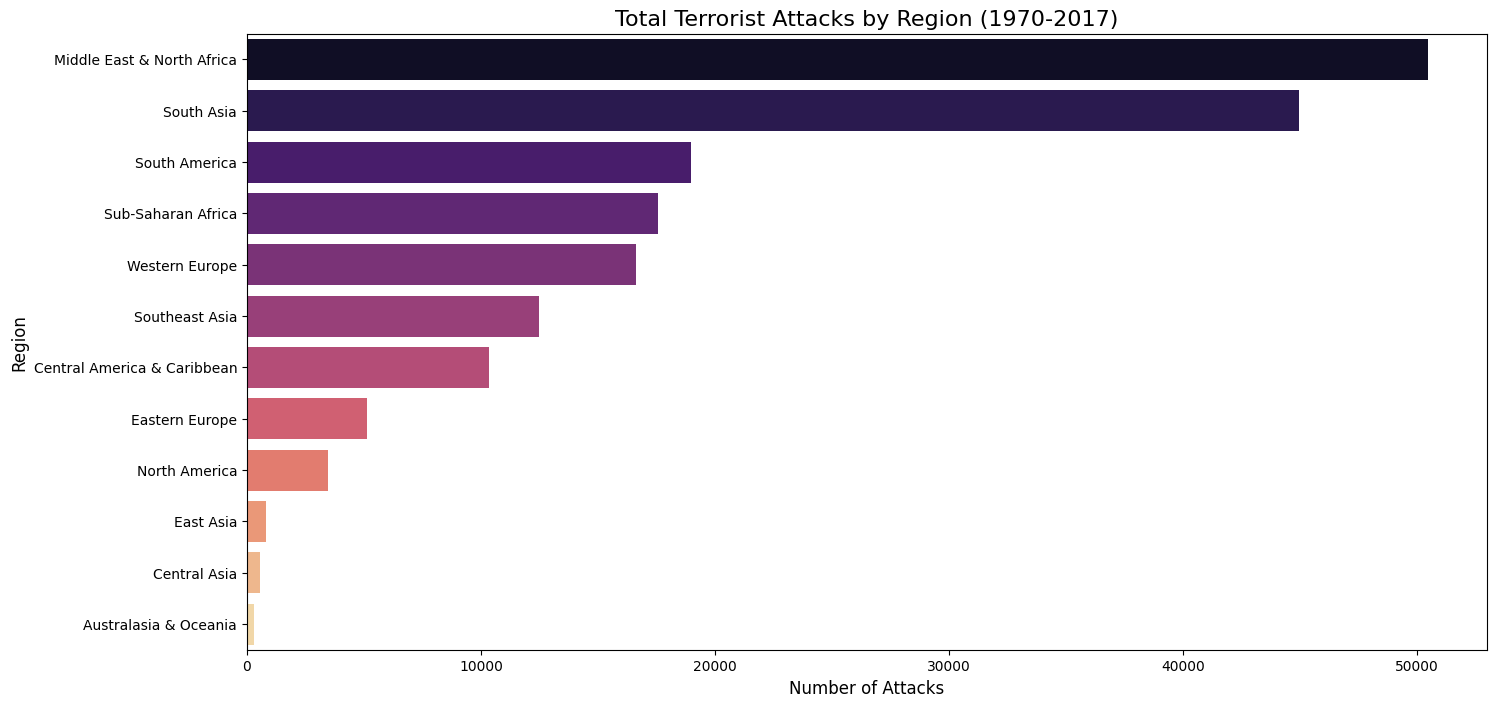

In [4]:
# --- Question 2: Attacks by Region ---
plt.figure(figsize=(16, 8))

# Count attacks by region
region_counts = df['Region'].value_counts()

sns.barplot(x=region_counts.values, y=region_counts.index, palette='magma')

plt.title('Total Terrorist Attacks by Region (1970-2017)', fontsize=16)
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

### Observation:

The Middle East & North Africa (MENA) and South Asia are the dominant regions for terrorist activity, accounting for the vast majority of recorded incidents. In contrast, regions like North America and Western Europe, despite high media coverage of specific events, face a significantly lower volume of attacks compared to conflict zones in Iraq, Afghanistan, and Pakistan.

## 3. Attack Methods: How do they attack?
This reveals the modus operandi of terrorist groups. Do they prefer bombs, guns, or kidnappings?

C:\Users\pandi\AppData\Local\Temp\ipykernel_16840\3135125099.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_type_counts.values, y=attack_type_counts.index, palette='viridis')


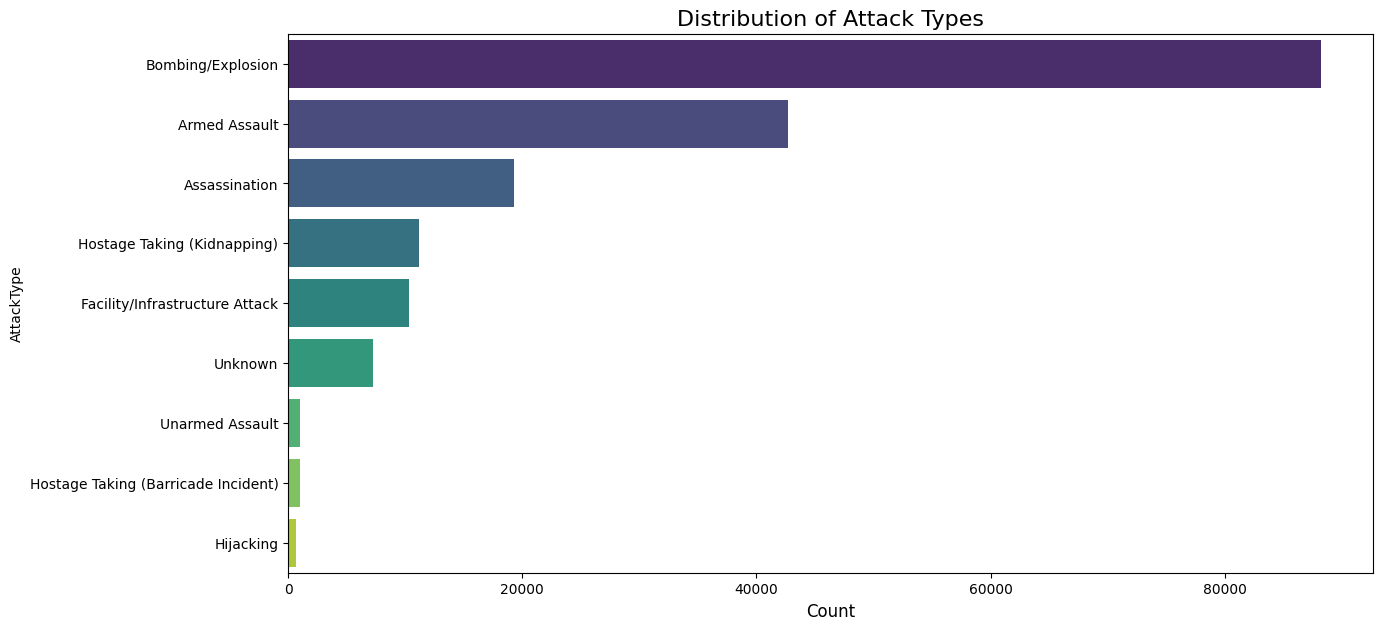

In [5]:
# --- Question 3: Most Common Attack Types ---
plt.figure(figsize=(14, 7))

# Count attack types
attack_type_counts = df['AttackType'].value_counts()

sns.barplot(x=attack_type_counts.values, y=attack_type_counts.index, palette='viridis')

plt.title('Distribution of Attack Types', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.show()

### Observation:

Bombing/Explosion is by far the most preferred method of attack, followed by Armed Assaults. This preference is likely due to the high impact-to-risk ratio of explosives (IEDs) compared to methods like assassination or hijacking, which require more direct confrontation and planning.

## 4. Who are the most active groups?
This visualization identifies the specific organizations responsible for the most incidents.

C:\Users\pandi\AppData\Local\Temp\ipykernel_16840\4282591334.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_groups.values, y=top_groups.index, palette='Reds_r')


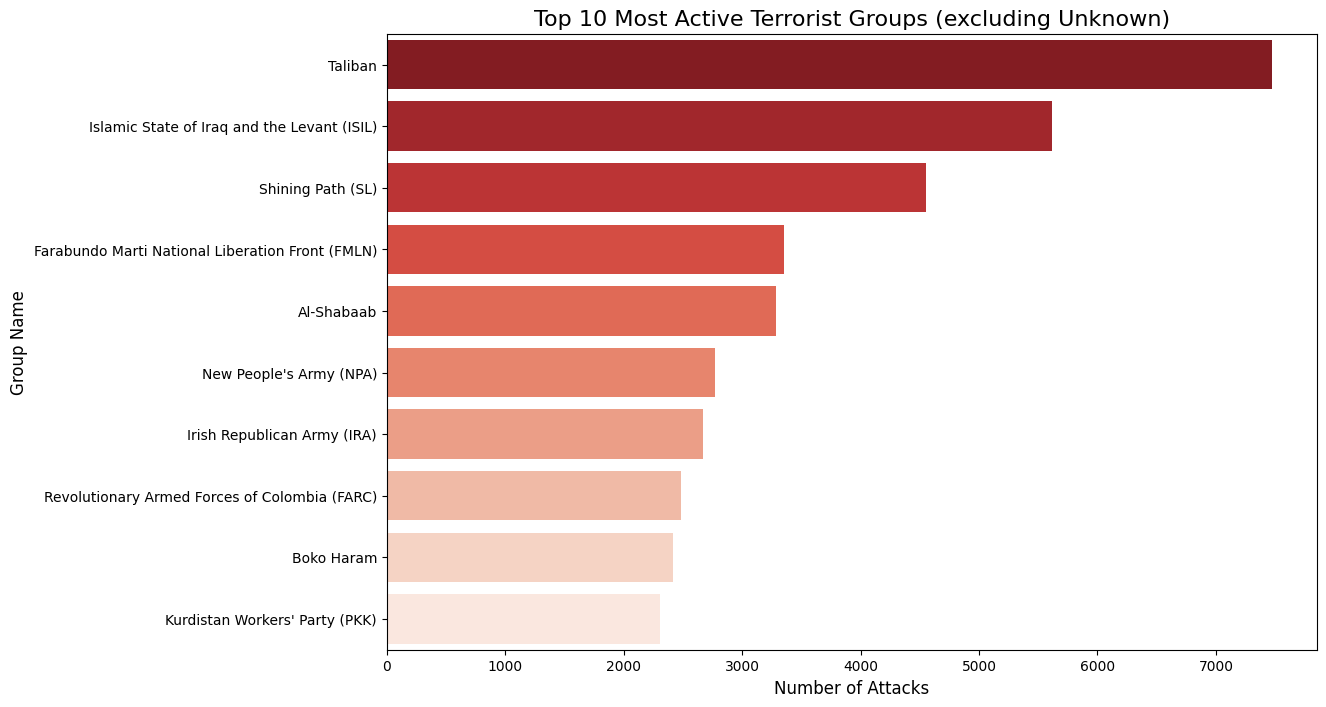

In [6]:
# --- Question 4: Top 10 Most Active Terrorist Groups ---
plt.figure(figsize=(12, 8))

# Filter out 'Unknown' groups to see the actual organizations
known_groups = df[df['Group'] != 'Unknown']

# Get the top 10 groups
top_groups = known_groups['Group'].value_counts().head(10)

sns.barplot(x=top_groups.values, y=top_groups.index, palette='Reds_r')

plt.title('Top 10 Most Active Terrorist Groups (excluding Unknown)', fontsize=16)
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Group Name', fontsize=12)
plt.show()

### Observation:

When excluding "Unknown" perpetrators, the Taliban and ISIL (Islamic State) emerge as the most active groups in the database history. Older groups like the Shining Path (Sendero Luminoso) also appear in the top rankings, reflecting the high violence of the late 20th century in South America, whereas the top spots are currently dominated by groups operating in the Middle East and South Asia.

## 5. Who are they targeting?
This helps explain the intent behind the violence. Are they fighting the military, or attacking civilians?

C:\Users\pandi\AppData\Local\Temp\ipykernel_16840\102766254.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.values, y=target_counts.index, palette='coolwarm')


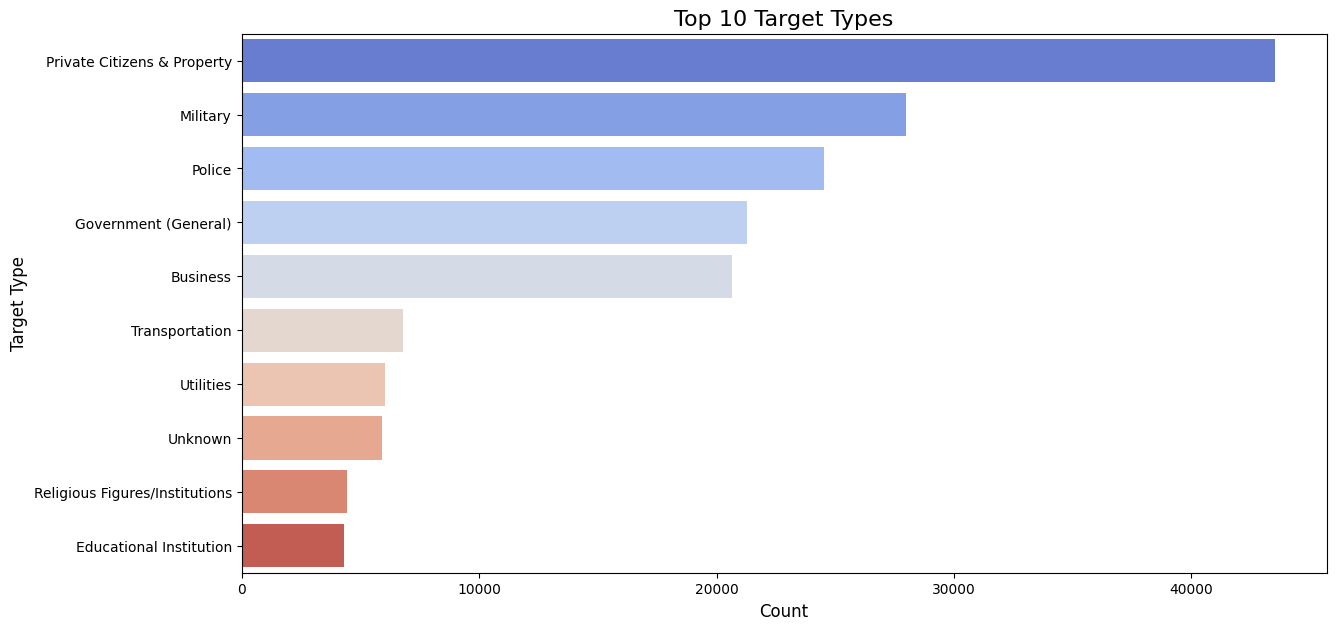

In [7]:
# --- Question 5: Most Common Targets ---
plt.figure(figsize=(14, 7))

# Count target types
target_counts = df['TargetType'].value_counts().head(10)

sns.barplot(x=target_counts.values, y=target_counts.index, palette='coolwarm')

plt.title('Top 10 Target Types', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Target Type', fontsize=12)
plt.show()

### Observation:

The primary targets of terrorism are Private Citizens & Property, closely followed by Military and Police targets. This highlights a critical insight: terrorism in this dataset is overwhelmingly directed at soft targets (civilians) rather than hardened government infrastructure, aiming to maximize fear and psychological impact.

## 6. Suicide Attacks vs. Non-Suicide (Impact Analysis)
This question adds statistical depth. We want to know if suicide attacks are deadlier on average.

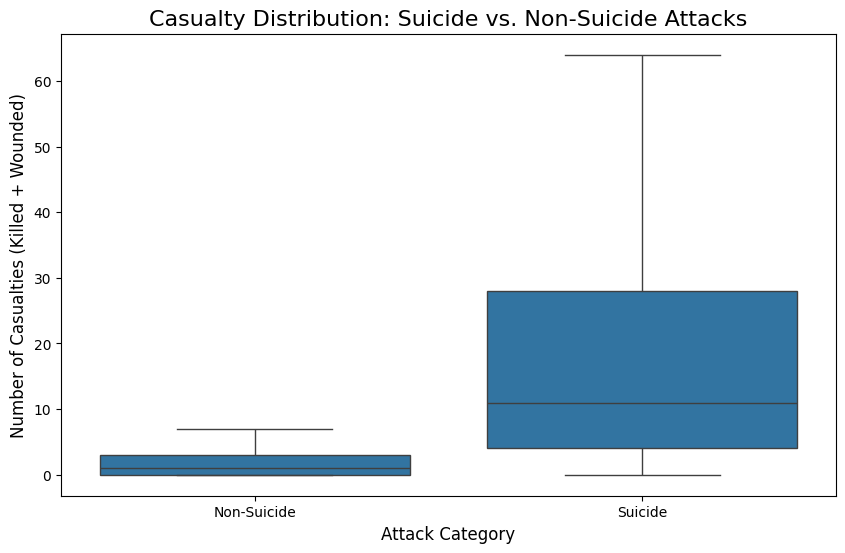

Average Casualties per Attack:
Non-Suicide: 4.21
Suicide:     29.96


In [8]:
# --- Question 6: Lethality of Suicide vs. Non-Suicide Attacks ---
plt.figure(figsize=(10, 6))

# Create a clean subset for this chart
suicide_data = df[['suicide', 'Casualties']].dropna()
# Map 0/1 to labels for better reading
suicide_data['suicide'] = suicide_data['suicide'].map({0: 'Non-Suicide', 1: 'Suicide'})

# Use a boxplot to show the distribution (limiting y-axis to see the box clearly)
sns.boxplot(x='suicide', y='Casualties', data=suicide_data, showfliers=False)

plt.title('Casualty Distribution: Suicide vs. Non-Suicide Attacks', fontsize=16)
plt.ylabel('Number of Casualties (Killed + Wounded)', fontsize=12)
plt.xlabel('Attack Category', fontsize=12)
plt.show()

# Print the actual averages to verify
avg_casualties = df.groupby('suicide')['Casualties'].mean()
print("Average Casualties per Attack:")
print(f"Non-Suicide: {avg_casualties[0]:.2f}")
print(f"Suicide:     {avg_casualties[1]:.2f}")

### Observation:

The statistical analysis confirms that Suicide attacks are significantly more lethal on average than non-suicide attacks. The box plot shows a higher median casualty count for suicide missions. This suggests that when attackers are willing to die, the operational capacity for mass casualties increases, likely due to the ability to infiltrate crowded areas with explosives.

## 7. Multivariate Analysis: Do different regions prefer different attack methods? (Heatmap)
Instead of just asking "What is the top attack?" or "What is the top region?", we ask: Does the region dictate the attack method?

Technique: We use a crosstab (cross-tabulation) and a Heatmap.

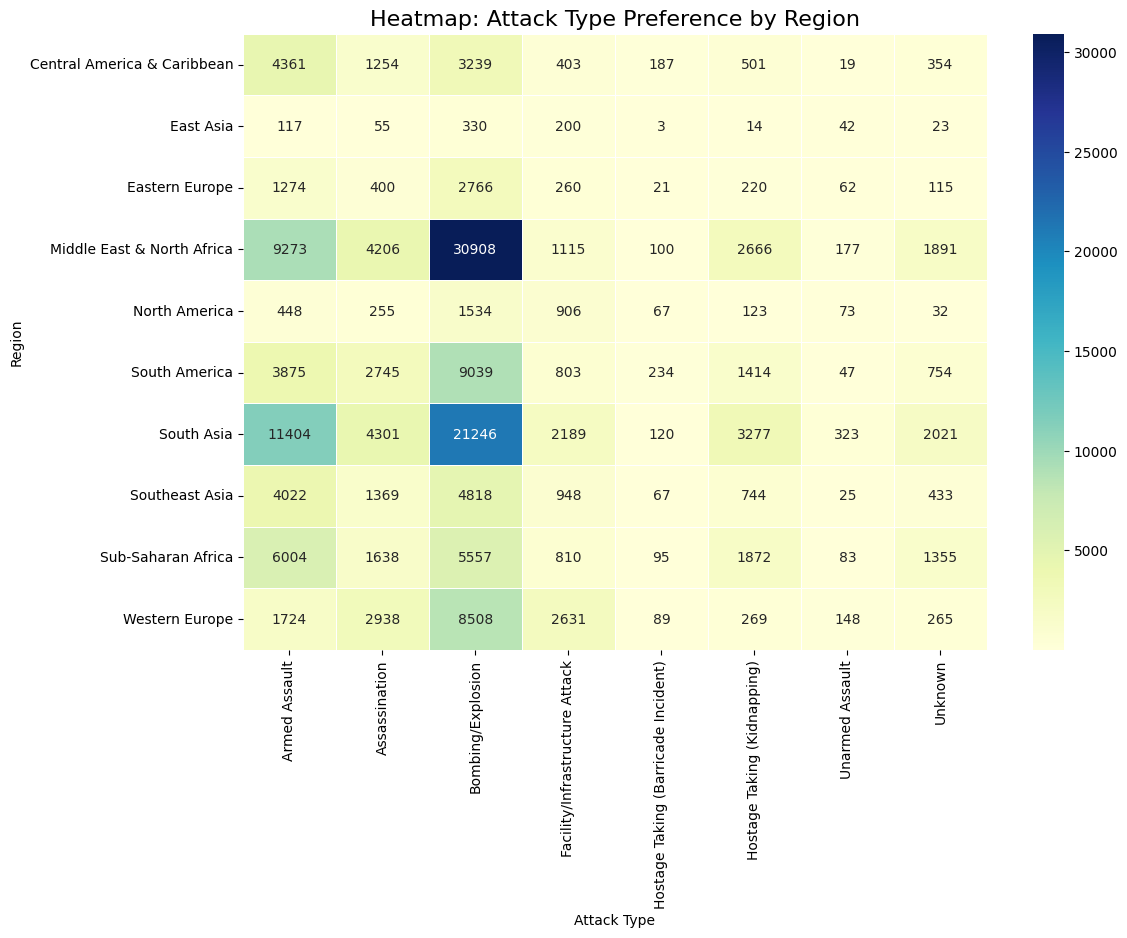

In [9]:
# --- Question 7: Heatmap of Attack Types by Region ---
plt.figure(figsize=(12, 8))

# Select only the top attack types and regions to keep the heatmap readable
top_regions = df['Region'].value_counts().index[:10]
top_attacks = df['AttackType'].value_counts().index[:8]

# Filter data
subset_df = df[(df['Region'].isin(top_regions)) & (df['AttackType'].isin(top_attacks))]

# Create a Cross-Tabulation
crosstab = pd.crosstab(subset_df['Region'], subset_df['AttackType'])

# Normalize by row (optional: helps see dominance per region) or just plot raw counts
# We will plot raw counts here for clarity
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

plt.title('Heatmap: Attack Type Preference by Region', fontsize=16)
plt.xlabel('Attack Type')
plt.ylabel('Region')
plt.show()

Heatmap (Region vs. Attack Type)
### Observation:

The heatmap reveals regional specializations. For instance, Bombings in the Middle East represent the highest density of attacks in the entire dataset. Interestingly, other regions may show different preferences; for example, Kidnappings are disproportionately frequent in certain sub-regions, indicating that local tactics are shaped by the specific goals (e.g., ransom vs. destruction) of regional groups.


## 8. Trend Analysis: The Rise and Fall of the Major Groups (Multi-Line Chart)
This is a complex time-series analysis. Instead of one line for "Total Attacks," we split the lines by "Group."

Analysis: This shows the lifespan of terrorist organizations. You will clearly see the "Al-Qaeda Era" vs. the "ISIS Era" vs. the "Taliban Era."

Technique: Grouping by both Year and Group.

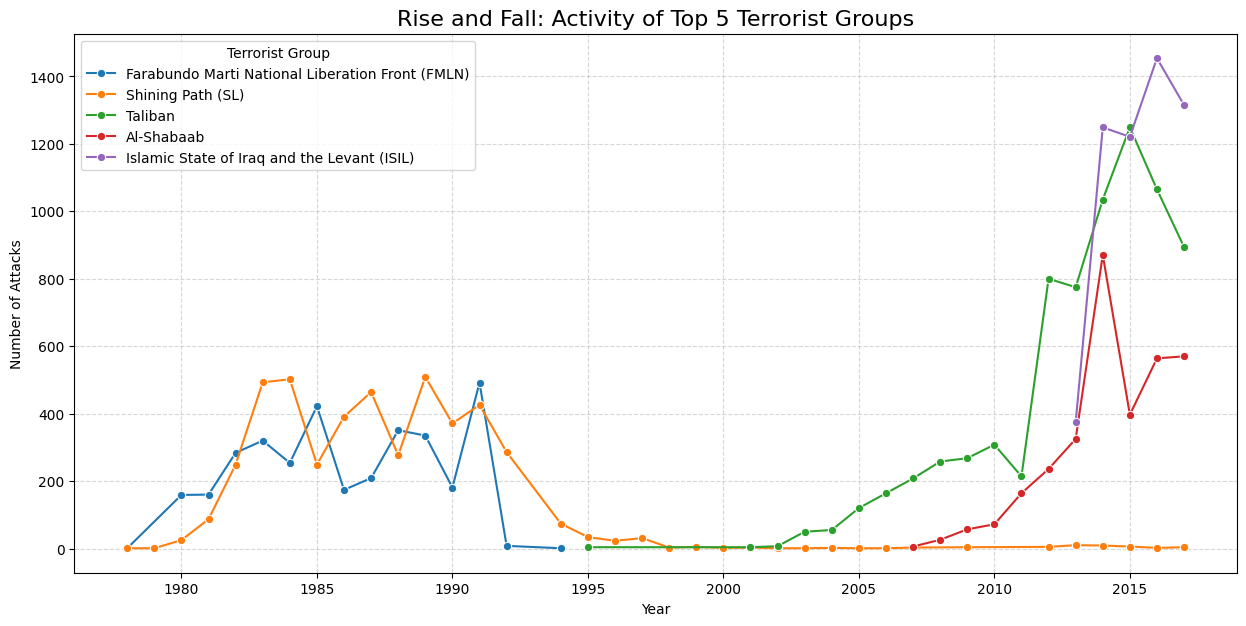

In [10]:
# --- Question 8: Activity of Top 5 Terrorist Groups Over Time ---
plt.figure(figsize=(15, 7))

# Identify the top 5 groups (excluding Unknown)
top_groups_list = df[df['Group'] != 'Unknown']['Group'].value_counts().head(5).index

# Filter data for these groups
groups_over_time = df[df['Group'].isin(top_groups_list)]

# Group by Year and Group Name to count attacks
group_trends = groups_over_time.groupby(['Year', 'Group']).size().reset_index(name='Attacks')

# Plot with Hue
sns.lineplot(x='Year', y='Attacks', hue='Group', data=group_trends, marker='o')

plt.title('Rise and Fall: Activity of Top 5 Terrorist Groups', fontsize=16)
plt.ylabel('Number of Attacks')
plt.xlabel('Year')
plt.legend(title='Terrorist Group')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Observation:

This multi-line chart illustrates the lifecycles of terrorist organizations. We can clearly see the "Shining Path" era peaking in the 1980s and declining afterwards, replaced in the timeline by the rapid, vertical rise of the Taliban and ISIL in the 21st century. This visualizes how the global "center of gravity" for terrorism has shifted from political insurgencies in the 20th century to religious extremism in the modern era.

## 9. Derived Metric: The "Success Rate" Evolution
We don't just want to know if attacks happened, but if they succeeded.

Analysis: We calculate a derived metric: Success Rate = (Successful Attacks / Total Attacks).

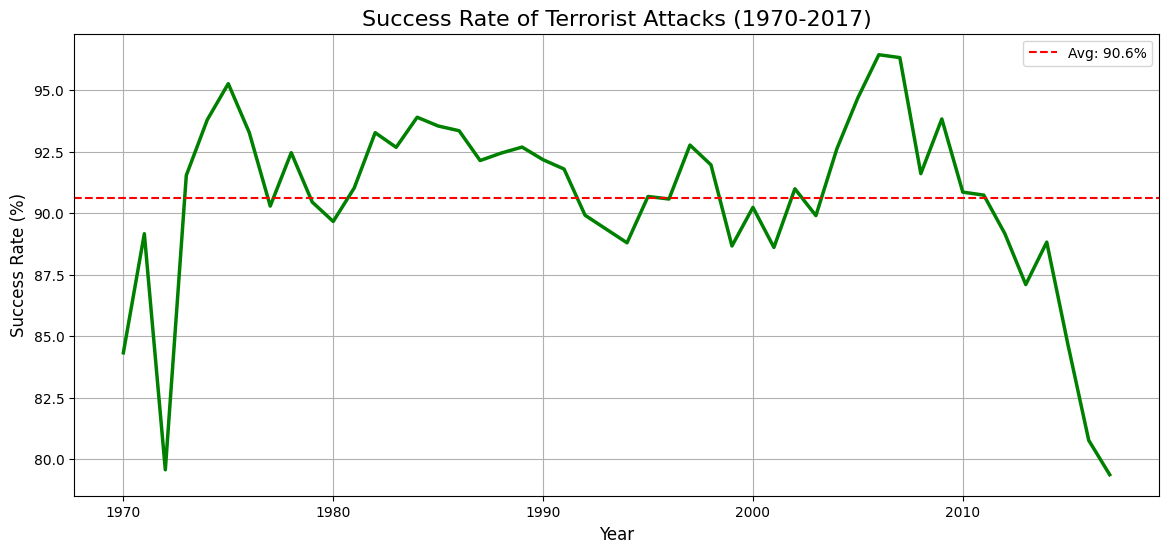

In [11]:
# --- Question 9: Global Success Rate of Attacks Over Time ---
plt.figure(figsize=(14, 6))

# Group by year and calculate the mean of the 'success' column
# (Since 'success' is 0 or 1, the mean represents the percentage)
success_rate = df.groupby('Year')['success'].mean() * 100

sns.lineplot(x=success_rate.index, y=success_rate.values, color='green', linewidth=2.5)

plt.title('Success Rate of Terrorist Attacks (1970-2017)', fontsize=16)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.axhline(y=success_rate.mean(), color='red', linestyle='--', label=f'Avg: {success_rate.mean():.1f}%')
plt.legend()
plt.grid(True)
plt.show()

### Observation:

The success rate of terrorist attacks (defined as the attack executing its intended tactical goal) has remained consistently high, generally hovering above 80-90%. However, slight fluctuations over time may reflect improving counter-terrorism measures or a shift by some groups towards more ambitious, complex plots that have a higher failure rate.

## 10. Geospatial Analysis: The "World Map" of Terror

Analysis: This visually reconstructs the world map using only attack data points.

Technique: Using Alpha (transparency) to show density.

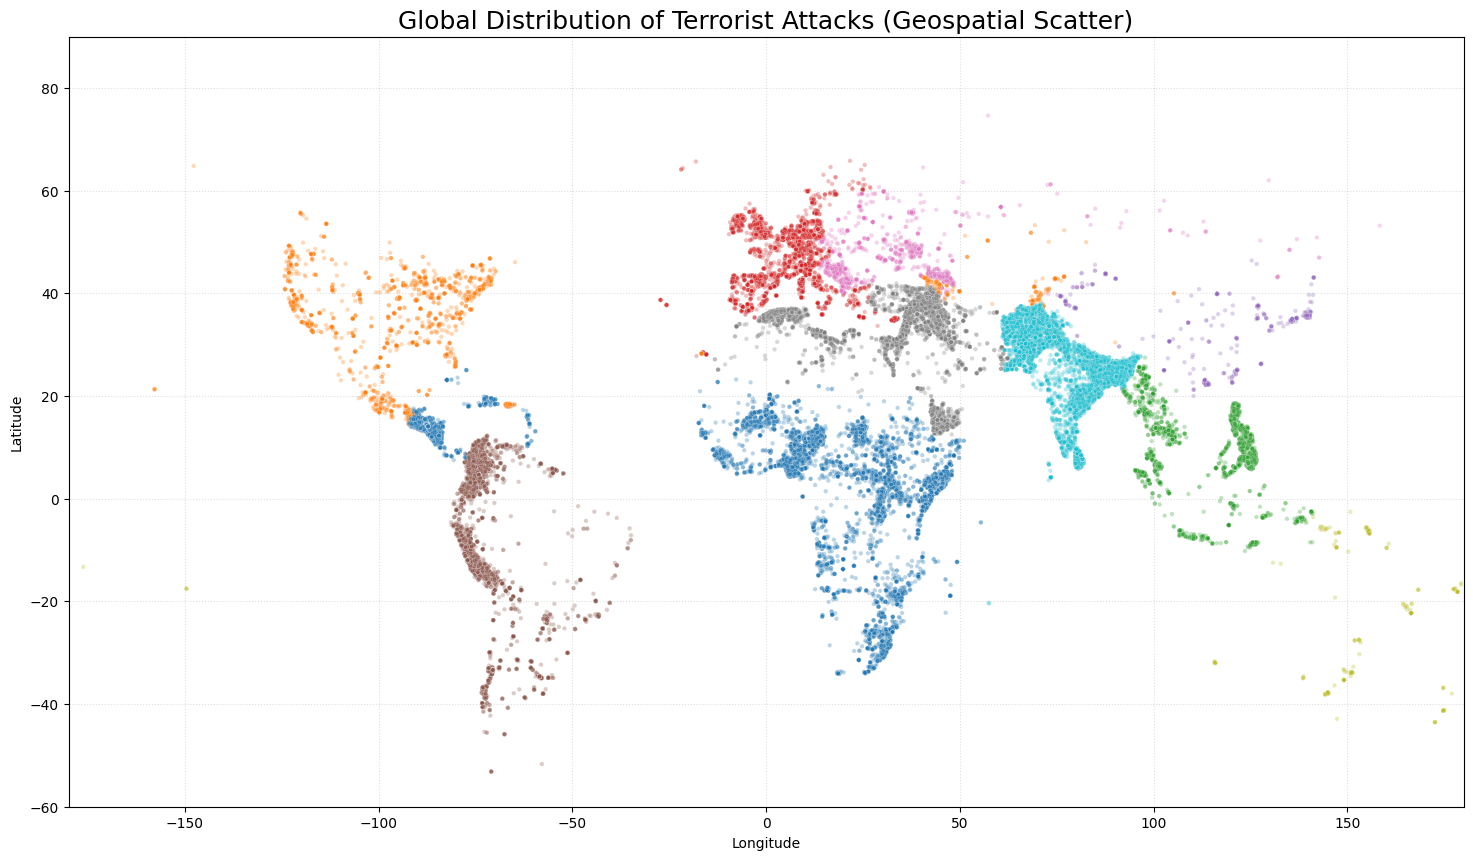

In [12]:
# --- Question 10: Geospatial Distribution of Attacks (World Scatter) ---
plt.figure(figsize=(18, 10))

# Filter out bad data (0,0 coordinates usually mean missing data)
geo_data = df[(df['longitude'] != 0) & (df['latitude'] != 0)].dropna(subset=['latitude', 'longitude'])

# Plot strictly the dots
sns.scatterplot(x='longitude', y='latitude', data=geo_data, 
                hue='Region', palette='tab10', s=10, alpha=0.3, legend=False)

plt.title('Global Distribution of Terrorist Attacks (Geospatial Scatter)', fontsize=18)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle=':', alpha=0.4)
# Limit axis to world map coordinates roughly
plt.xlim(-180, 180)
plt.ylim(-60, 90)
plt.show()

In [23]:
# --- Question 10: Interactive World Map of Terror (Fixed) ---
import plotly.express as px

# 1. Inspect column names to be safe (Optional, just to verify)
# print(df.columns) 

# 2. Filter data (Using lowercase 'city')
# We check if 'city', 'latitude', and 'longitude' exist before dropping NaNs
df_map = df[df['Casualties'] > 5].dropna(subset=['latitude', 'longitude', 'city'])

# 3. Create the Interactive Map
fig = px.scatter_geo(
    df_map,
    lat='latitude',
    lon='longitude',
    color='Region',
    hover_name='city',                  # Changed from 'City' to 'city'
    size='Casualties',
    projection='natural earth',
    title='Global Terrorism Hotspots (Attacks with >5 Casualties)',
    template='plotly_dark'
)

fig.update_layout(height=600, margin={"r":0,"t":50,"l":0,"b":0})
fig.show(renderer="browser")

### Observation:

The geospatial analysis clarifies that terrorism is not evenly distributed but is highly clustered. The map shows dense "hotspots" of high-casualty attacks concentrated in the Levant (Syria/Iraq), Afghanistan, and the border regions of India/Pakistan. Large portions of the world, including significant parts of the Southern Hemisphere and developed nations, remain relatively sparse in comparison to these conflict zones.